In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("desktop/7003_1.csv")
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
df.head()

C:\Users\FiercePC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,36,39,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,asins,brand,...,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,...,7.63181E+11,NaN,NaN


## Removing Irrelevant Columns

In [23]:
FILTERED_DATA = df[[
    "id",
    "brand",
    "categories",
    "colors",
    "descriptions",
    "features",
    "merchants",
    "name",
    "prices.amountMax",
    "prices.currency",
    "prices.merchant",
    "sizes",
]]
test.head()

,id,brand,categories,...,prices.currency,prices.merchant,sizes
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10,9"
1,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
2,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
3,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,NaN,"8.5,7,7.5,8"


In [29]:
len(df["id"].unique())

10000

In [30]:
df["prices.currency"].unique()

array(['USD', 'CAD', 'AUD', 'EUR', nan, 'GBP',
       'Off Price Direct - Walmart.com', 'new'], dtype=object)

## Specific Analysis (Nike)

In [36]:
nike_df = ps.sqldf("select * from df where lower(brand) = 'nike'")
nike_price_list = nike_df["prices.amountMax"]

In [34]:
npl = []

for item in nike_price_list:
    npl.append(float(item))

npl = sorted(npl)

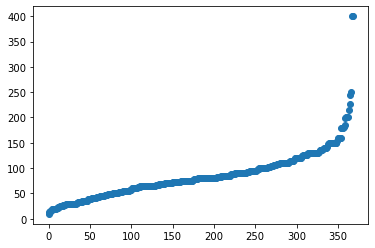

In [35]:

nike_price_list = np.array(nike_price_list)

plt.scatter(range(len(npl)), npl)
plt.show()

(array([ 6., 19., 25., 25., 26., 35., 43., 42., 32., 23., 21., 16., 19.,
         6., 12.,  4.,  0.,  4.,  1.,  4.,  0.,  1.,  1.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.]),
 array([  9.5    ,  19.26225,  29.0245 ,  38.78675,  48.549  ,  58.31125,
         68.0735 ,  77.83575,  87.598  ,  97.36025, 107.1225 , 116.88475,
        126.647  , 136.40925, 146.1715 , 155.93375, 165.696  , 175.45825,
        185.2205 , 194.98275, 204.745  , 214.50725, 224.2695 , 234.03175,
        243.794  , 253.55625, 263.3185 , 273.08075, 282.843  , 292.60525,
        302.3675 , 312.12975, 321.892  , 331.65425, 341.4165 , 351.17875,
        360.941  , 370.70325, 380.4655 , 390.22775, 399.99   ]),
 <BarContainer object of 40 artists>)

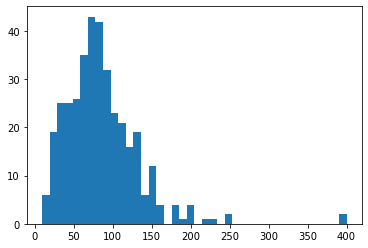

In [98]:
plt.hist(npl, bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x13f37694250>,
 'caps': [<matplotlib.lines.Line2D at 0x13f37694910>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f376a2eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x13f37694fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13f3764e370>],
 'means': []}

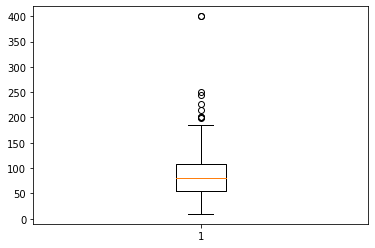

In [94]:
plt.boxplot(npl)

In [49]:
df[["brand", "prices.amountMax"]]

,brand,prices.amountMax
0,Zoot,71.99
1,Zoot,250
2,Zoot,75.99
3,Zoot,79.98
4,Wild Pair,26.98
...,...,...
19040,NIXON,130
19041,Tundra,39.99
19042,Tundra,66
19043,Tundra,49.98


In [10]:
df.dropna() # no data which has every column filled

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight
